
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining S&P 500 Sectors.  Construct portfolios from the S&P 500 Sector ETFs and examine the results of different weighting schemes.  In particular, we can select the best performing sectors over a given period.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,31.56,16.06,24.17,13.21,14.71,13.59,7.62,16.83,24.17,1.44
1,DIA,DJIA ETF,US Stocks:Large Cap,72.48,25.42,17.79,11.31,11.24,11.64,6.03,16.61,17.79,1.07
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,16.70,19.68,23.53,15.65,19.45,19.89,12.06,21.23,23.53,1.11
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,37.27,18.56,24.03,12.68,14.16,13.54,7.54,17.15,24.03,1.40
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,36.52,10.13,15.90,6.38,7.94,15.96,8.61,22.72,15.90,0.70
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,59.03,13.81,17.73,9.49,10.89,13.44,6.60,20.31,17.73,0.87
6,IWD,Russell 1000 Value ETF,US Stocks:Value,75.82,11.42,18.03,8.71,9.58,11.24,5.65,16.71,18.03,1.08
7,IWF,Russell 1000 Growth ETF,US Stocks:Growth,12.87,25.84,29.64,16.53,18.38,20.95,12.05,19.58,29.64,1.51
8,RSP,S&P 500 Equal Weight ETF,US Stocks:Growth,53.21,7.60,16.15,7.98,11.27,10.99,5.72,18.10,16.15,0.89
9,SPSM,S&P 600 Small Cap ETF,US Stocks:Small Cap,42.70,14.39,13.46,6.08,9.19,14.19,7.85,22.47,13.46,0.60


In [6]:
# Sector Ranking
sector_rank = bb.rank(df, rank_by='Sharpe Ratio')
sector_rank = sector_rank[sector_rank['Description'].str.contains('Sector ETF')]
#sector_rank = sector_rank.loc[(sector_rank['3 mo'] > 0) & sector_rank['1 Yr'] > 0]
#sector_rank = rank_filtered.head(10)
sector_rank

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
22,XLU,S&P500 Utilities Sector ETF,US Stocks:Utilities,39.26,-3.75,30.49,8.71,5.93,20.94,11.60,17.71,30.49,1.72
17,XLF,S&P500 Financials Sector ETF,US Stocks:Financials,115.50,47.29,33.23,12.14,13.41,15.17,8.41,20.41,33.23,1.63
15,XLC,S&P500 Communication Services Sector ETF,US Stocks:Communication Services,88.08,53.02,33.05,14.52,14.09,12.02,6.55,20.56,33.05,1.61
24,XLY,S&P500 Consumer Discretionary Sector ETF,US Stocks:Consumer Discretionary,37.79,82.14,34.47,10.07,14.10,16.73,8.19,24.76,34.47,1.39
18,XLI,S&P500 Industrials Sector ETF,US Stocks:Industrials,77.02,10.49,22.94,13.32,12.75,14.24,6.16,19.68,22.94,1.17
20,XLP,S&P500 Consumer Staples Sector ETF,US Stocks:Consumer Staples,9.75,-4.07,10.54,4.80,7.27,14.51,7.72,12.91,10.54,0.82
19,XLK,S&P500 Technology Sector ETF,US Stocks:Technology,-17.20,-3.60,15.09,15.80,20.03,27.44,18.52,22.29,15.09,0.68
21,XLRE,S&P500 Real Estate Sector ETF,US Stocks:Real Estate,36.90,-16.61,11.63,-0.09,4.19,19.84,11.35,21.21,11.63,0.55
23,XLV,S&P500 Healthcare Sector ETF,US Stocks:Healthcare,125.65,-2.31,6.14,6.50,9.25,13.77,4.99,13.80,6.14,0.44
14,XLB,S&P500 Materials Sector ETF,US Stocks:Materials,100.19,-19.17,8.53,4.63,10.70,13.43,5.76,21.26,8.53,0.40


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# S&P 500 Sectors - top 4
top_sectors_portfolio = {
    'Title': 'Top S&P500 Sectors Portfolio'
}
top_sectors = list(sector_rank['Investment Option'])[:4]
top_sectors_portfolio.update(dict.fromkeys(top_sectors, 1/len(top_sectors)))

# S&P 500 Sectors - all
all_sectors_portfolio = {
    'Title': 'All S&P500 Sectors Portfolio'
}
all_sectors = list(sector_rank['Investment Option'])
all_sectors_portfolio.update(dict.fromkeys(all_sectors, 1/len(all_sectors)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = all_sectors_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLU,XLF,XLC,XLY,XLI,XLP,XLK,XLRE,XLV,XLB,XLE,All S&P500 Sectors Portfolio
Annual Returns,30.49,33.23,33.05,34.47,22.94,10.54,15.09,11.63,6.14,8.53,6.53,18.96
Std Dev,17.71,20.41,20.56,24.76,19.68,12.91,22.29,21.21,13.80,21.26,26.22,14.08
Sharpe Ratio,1.72,1.63,1.61,1.39,1.17,0.82,0.68,0.55,0.44,0.40,0.25,1.35
Weight,0.06,0.09,0.11,0.09,0.12,0.09,0.04,0.06,0.15,0.13,0.06,1.00
Worst Typical Down Year,-4.93,-7.59,-8.07,-15.05,-16.42,-15.28,-29.49,-30.79,-21.46,-33.99,-45.91,-9.21
Black Swan,-22.64,-28.00,-28.63,-39.81,-36.10,-28.19,-51.78,-52.00,-35.26,-55.25,-72.13,-23.30


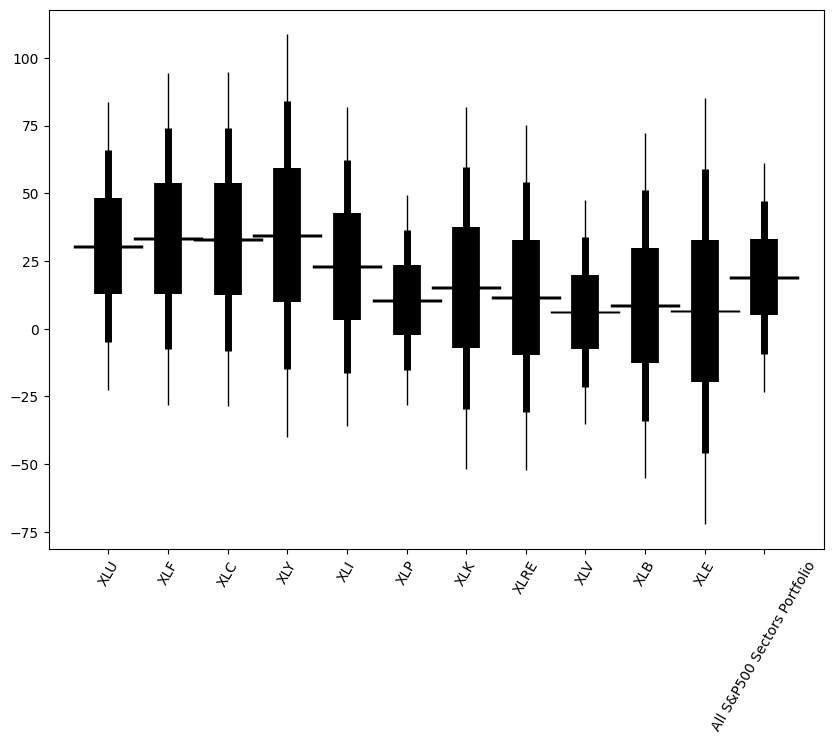

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

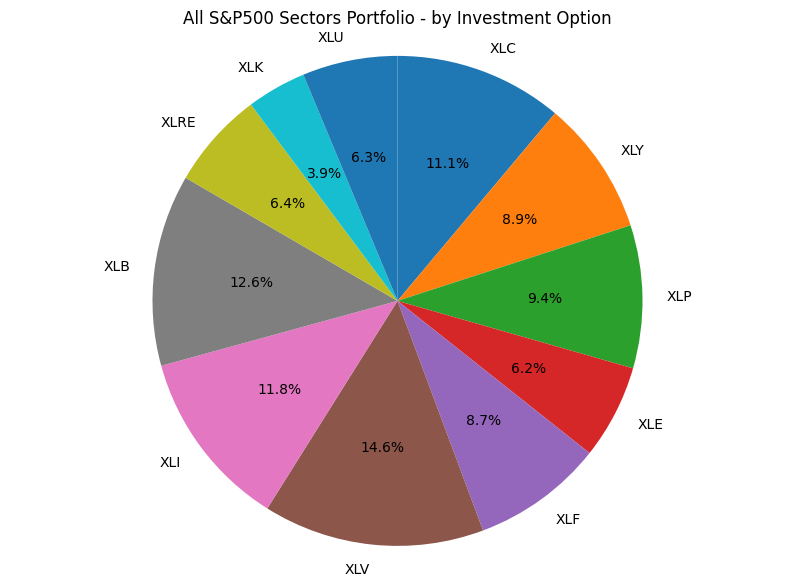

XLC    0.11
XLY    0.09
XLP    0.09
XLE    0.06
XLF    0.09
XLV    0.15
XLI    0.12
XLB    0.13
XLRE   0.06
XLK    0.04
XLU    0.06



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

All S&P500 Sectors Portfolio Weights:
    XLU                            0.0628
    XLF                            0.0866
    XLC                            0.1112
    XLY                            0.0889
    XLI                            0.1182
    XLP                            0.0943
    XLK                            0.0393
    XLRE                           0.0642
    XLV                            0.1459
    XLB                            0.1264
    XLE                            0.0622


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).